In [3]:
import pandas as pd
import time
from itertools import combinations
import matplotlib.cm as cm

In [4]:
df = pd.read_csv("covid19_tweets.csv")
df.head(100)

user_name         user_location  \
0                                          ᏉᎥ☻լꂅϮ            astroworld   
1                                   Tom Basile 🇺🇸          New York, NY   
2                                 Time4fisticuffs      Pewee Valley, KY   
3                                     ethel mertz  Stuck in the Middle    
4                                        DIPR-J&K     Jammu and Kashmir   
..                                            ...                   ...   
95                                          Safiy                   NaN   
96                                TNCoronaUpdates        Chennai, India   
97  CraigBrigham MebaneNC #864511320 #GoodTrouble            Mebane, NC   
98                                        The GAA               Ireland   
99                                    RumpusGuy64               Cardiff   

                                     user_description         user_created  \
0   wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1   Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2   #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3   #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4   🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   
..                                                ...                  ...   
95  Detroit life. Creative Beast, Animation, Visua...  2019-11-18 16:27:39   
96  Data Analyzer |  Stay Connected For All Offici...  2018-04-09 16:00:11   
97  Fmr Army Security Agency, Meritorious Service....  2019-05-08 14:11:05   
98  Gaelic Athletic Association/Cumann Lúthchleas ...  2009-11-13 13:40:15   
99  N64 geek, craft beer w*nker, foodie (@eatcardi...  2010-01-07 13:46:43   

    user_followers  user_friends  user_favourites  user_verified  \
0              624           950            18775          False   
1             2253          1677               24           True   
2             9275          9525             7254          False   
3              197           987             1488          False   
4           101009           168              101          False   
..             ...           ...              ...            ...   
95               9            33               42          False   
96            6601            24            22269          False   
97              77           676             1542          False   
98          398260           150             2864           True   
99             170           724            11790          False   

                   date                                               text  \
0   2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1   2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2   2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3   2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4   2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   
..                  ...                                                ...   
95  2020-07-25 12:24:20  Shout out to Earth. Hands down the worst react...   
96  2020-07-25 12:24:19  #TamilNadu | #COVID19 |  25th July\n\n●  TN - ...   
97  2020-07-25 12:24:19  @WLOS_13 @wcti12 @thecw22 @myrdc @ABC45TV Plea...   
98  2020-07-25 12:24:17  You can all #PlayYourPart in the fight against...   
99  2020-07-25 12:24:14  The Egyptians ain't got shit on this. #COVID19...   

                                         hashtags               source  \
0                                             NaN   Twitter for iPhone   
1                                             NaN  Twitter for Android   
2                                     ['COVID19']  Twitter for Android   
3                                     ['COVID19']   Twitter for iPhone   
4               ['CoronaVirusUpdates', 'COVID19']  Twitter for Android   
..  

In [5]:
#remove rows with missing values
df = df.dropna()
len(df)

99138

In [6]:
#check for hastags which have the hashtag vaccine, anti vaccine, covid vaccine
df_hash = df['hashtags']
tags = set()
count = 0
anti =0 
for row in iter(df_hash):
    #convert str to list
    
    row = row[1:-1].split(", ")
    for tag in row:
        tag = tag.replace("'", "").strip()
        tag = tag.lower()
        tags.add(tag)
    if tag == "vaccine" or tag == "anti-vaccine" or tag == "covid vaccine":
        count += 1
    if tag == "antivax":
        anti += 1

print(len(tags))

30974


In [7]:
c =0 
#write tag to a file
tags = []
for idx,row in df.iterrows():
    hashs = row['hashtags']
    hashs = hashs[1:-1].split(", ")
    for tag in hashs:
        tags.append(tag)
        if tag.startswith("antivaxx"):
            c += 1
with open("tags.txt", "w") as f:
    for tag in tags:
        f.write(tag)
        f.write("\n")
        if tag.startswith("antivax"):
            c += 1

In [8]:
tags = list(tags)
for tag in tags:
    #convert to lowercase
    tag = tag.lower()
    print(tag)




'covid19'
'covid19'
'coronavirusupdates'
'covid19'
'coronavirus'
'covid19'
'covid19'
'recruiting'
'hurricanehanna'
'covid19'
'logo'
'graphicdesigner'
'logodesign'
'logodesinger'
'icon'
'minimalist'
'abstract'
'covid19'
'covid19'
'covid19'
'keepsocialdistance'
'covid19'
'homework'
'wash'
'covid19'
'covid19'
'kolar'
'blood'
'covid19'
'bosniaandherzegovina'
'covid19'
'tncoronaupdate'
'tn'
'covid19'
'covid19'
'vishal'
'covid19'
'africa'
'covid19'
'covid19'
'borisjohnson'
'5cobra'
'five'
'covid19'
'playyourpart'
'covid19'
'covid19'
'covid19'
'delhi'
'covid19'
'tamilnadu'
'covid19'
'covid19'
'covid19'
'covid19'
'covid19'
'coronavirus'
'obesity'
'زواج_راكان_الحربي'
'carryminati'
'my200vsbutch200'
'covid19'
'etsy'
'epiconetsy'
'masksforsale'
'covid19'
'industry'
'saturdayvibes'
'covid19'
'covid19'
'political'
'covid19'
'clean'
'salescoach'
'businesscoach'
'salesforce'
'nstworld'
'nationaldayrally'
'ndr'
'amitshah'
'covid19'
'coronavirus'
'covid19'
'covid19'
'durbanjuly'
'covid19'
'alreadyvideo

In [9]:
#get user mentions from the data tweet
#there is no column for user mentions
#we can extract user mentions from the tweet text
#create a column for user mentions

df_text = df['text']
mentions = set()
for row in iter(df_text):
    row = row.split()
    for word in row:
        if word[0] == "@":
            mentions.add(word[1:])


In [10]:
def extract_user_mentions(text):
    words = text.split()
    mentions = [word[1:] for word in words if word[0] == "@" and len(word) > 1]
    return mentions

In [11]:
df['user_mentions'] = df['text'].apply(extract_user_mentions)
df

user_name         user_location  \
2              Time4fisticuffs      Pewee Valley, KY   
3                  ethel mertz  Stuck in the Middle    
4                     DIPR-J&K     Jammu and Kashmir   
5             🎹 Franz Schubert           Новоро́ссия   
6                 hr bartender       Gainesville, FL   
...                        ...                   ...   
179101       New Jersey Herald            Newton, NJ   
179102                    Pris                  T.O.   
179103  AJIMATI AbdulRahman O.       Ilorin, Nigeria   
179104                   Jason               Ontario   
179106           Gary DelPonte         New York City   

                                         user_description  \
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...   
4       🖊️Official Twitter handle of Department of Inf...   
5       🎼  #Новоро́ссия #Novorossiya #оставайсядома #S...   
6       Workplace tips and advice served up in a frien...   
...                                                   ...   
179101  The New Jersey Herald, a daily newspaper in Ne...   
179102  A/V/L Techie, camera op. but twitter has becom...   
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea   
179104  When your cat has more baking soda than Ninja ...   
179106  Global UX UI Visual Designer. StoryTeller, Mus...   

               user_created  user_followers  user_friends  user_favourites  \
2       2009-02-28 18:57:41            9275          9525             7254   
3       2019-03-07 01:45:06             197           987             1488   
4       2017-02-12 06:45:15          101009           168              101   
5       2018-03-19 16:29:52            1180          1071             1287   
6       2008-08-12 18:19:49           79956         54810             3801   
...                     ...             ...           ...              ...   
179101  2010-01-07 18:19:37            6274           162               38   
179102  2008-12-31 16:16:12             251           160              627   
179103  2013-12-30 18:59:19             412          1609             1062   
179104  2011-12-21 04:41:30             150           182             7295   
179106  2009-10-27 17:43:13            1338          1111                0   

        user_verified                 date  \
2               False  2020-07-25 12:27:14   
3               False  2020-07-25 12:27:10   
4               False  2020-07-25 12:27:08   
5               False  2020-07-25 12:27:06   
6               False  2020-07-25 12:27:03   
...               ...                  ...   
179101          False  2020-08-29 19:44:27   
179102          False  2020-08-29 19:44:23   
179103          False  2020-08-29 19:44:21   
179104          False  2020-08-29 19:44:16   
179106          False  2020-08-29 19:44:14   

                                                     text  \
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
5       #coronavirus #covid19 deaths continue to rise....   
6       How #COVID19 Will Change Work in General (and ...   
...                                                   ...   
179101  Wallkill school nurse adds COVID-19 monitoring...   
179102  we have reached 25mil cases of #covid19, world...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179106  More than 1,200 students test positive for #CO...   

                                               hashtags               source  \
2                                           ['COVID19']  Twitter for Android   
3                                           ['COVID19']   Twitter for iPhone   
4                     ['CoronaVirusUpdates', 'COVID19']  Twitter for Android   
5                            ['coronavirus', 'covid19']      Twitter Web

In [12]:
df_mentions = df['user_mentions']   
count =0
for row in iter(df_mentions):
    if len(row) < 1:
        count +=1

count

75408

In [13]:
import string
df_users = df['user_name']
df_mentions = df['user_mentions']
def clean_username(username):
    username = username.lower()
    username = username.translate(str.maketrans('', '', string.punctuation))
    return username

def clear_mentions(mentions):
    mentions = [clean_username(mention) for mention in mentions]
    return mentions

    
    

In [14]:
df['user_name']= df_users.apply(clean_username)
df['user_mentions'] = df_mentions.apply(clear_mentions)

In [15]:
users = df['user_name']
mentions = df['user_mentions']

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges based on user_name and user_mentions
for index, row in df.iterrows():
    user = row['user_name']
    mentions = row['user_mentions']
    for mention in mentions:
        G.add_edge(user, mention)


In [17]:
def convert_to_words(char_list):
    # Join the characters to form a string
    joined_string = ''.join(char_list)
    # Remove unwanted characters
    cleaned_string = joined_string.replace('[', '').replace(']', '').replace("'", '').replace(",", '')
    # Split by spaces if there are multiple hashtags
    return cleaned_string.split()

df['hashtags'] = df['hashtags'].apply(convert_to_words)

# Convert hashtags to lowercase
df['hashtags'] = df['hashtags'].apply(lambda tags: [tag.lower() for tag in tags])


In [18]:
df

user_name         user_location  \
2             time4fisticuffs      Pewee Valley, KY   
3                 ethel mertz  Stuck in the Middle    
4                      diprjk     Jammu and Kashmir   
5            🎹 franz schubert           Новоро́ссия   
6                hr bartender       Gainesville, FL   
...                       ...                   ...   
179101      new jersey herald            Newton, NJ   
179102                   pris                  T.O.   
179103  ajimati abdulrahman o       Ilorin, Nigeria   
179104                  jason               Ontario   
179106          gary delponte         New York City   

                                         user_description  \
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...   
4       🖊️Official Twitter handle of Department of Inf...   
5       🎼  #Новоро́ссия #Novorossiya #оставайсядома #S...   
6       Workplace tips and advice served up in a frien...   
...                                                   ...   
179101  The New Jersey Herald, a daily newspaper in Ne...   
179102  A/V/L Techie, camera op. but twitter has becom...   
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea   
179104  When your cat has more baking soda than Ninja ...   
179106  Global UX UI Visual Designer. StoryTeller, Mus...   

               user_created  user_followers  user_friends  user_favourites  \
2       2009-02-28 18:57:41            9275          9525             7254   
3       2019-03-07 01:45:06             197           987             1488   
4       2017-02-12 06:45:15          101009           168              101   
5       2018-03-19 16:29:52            1180          1071             1287   
6       2008-08-12 18:19:49           79956         54810             3801   
...                     ...             ...           ...              ...   
179101  2010-01-07 18:19:37            6274           162               38   
179102  2008-12-31 16:16:12             251           160              627   
179103  2013-12-30 18:59:19             412          1609             1062   
179104  2011-12-21 04:41:30             150           182             7295   
179106  2009-10-27 17:43:13            1338          1111                0   

        user_verified                 date  \
2               False  2020-07-25 12:27:14   
3               False  2020-07-25 12:27:10   
4               False  2020-07-25 12:27:08   
5               False  2020-07-25 12:27:06   
6               False  2020-07-25 12:27:03   
...               ...                  ...   
179101          False  2020-08-29 19:44:27   
179102          False  2020-08-29 19:44:23   
179103          False  2020-08-29 19:44:21   
179104          False  2020-08-29 19:44:16   
179106          False  2020-08-29 19:44:14   

                                                     text  \
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
5       #coronavirus #covid19 deaths continue to rise....   
6       How #COVID19 Will Change Work in General (and ...   
...                                                   ...   
179101  Wallkill school nurse adds COVID-19 monitoring...   
179102  we have reached 25mil cases of #covid19, world...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179106  More than 1,200 students test positive for #CO...   

                                       hashtags               source  \
2                                     [covid19]  Twitter for Android   
3                                     [covid19]   Twitter for iPhone   
4                 [coronavirusupdates, covid19]  Twitter for Android   
5                        [coronavirus, covid19]      Twitter Web App   
6                         [covid19, recruit

In [19]:
#get min and max of df['user_followers']
mini = df['user_followers'].min()
maxi = df['user_followers'].max()
#perform min max normalization
df['user_followers'] = (df['user_followers'] - mini) / (maxi - mini)

In [20]:
from collections import Counter

# Flatten the list of hashtags and count occurrences
all_hashtags = [hashtag for hashtags in df['hashtags'] for hashtag in hashtags]
hashtag_counts = Counter(all_hashtags)

# Find the most common hashtags
most_common_hashtags = hashtag_counts.most_common()

# Display the top hashtags
print("Most frequent hashtags:")
for hashtag, count in most_common_hashtags:
    print(f"{hashtag}: {count}")

Most frequent hashtags:
covid19: 77777
coronavirus: 6857
pandemic: 1256
covid: 973
india: 972
corona: 941
trump: 729
lockdown: 701
odisha: 652
wearamask: 629
vaccine: 558
covid_19: 487
coronainfoch: 405
coronavirusupdates: 401
china: 397
breaking: 392
usa: 385
staysafe: 383
socialdistancing: 363
indiafightscorona: 359
masks: 351
us: 348
russia: 332
blood: 331
health: 328
mask: 314
uk: 308
covidiots: 294
covidー19: 274
healthcare: 252
auspol: 252
trumpvirus: 241
sarscov2: 239
cdc: 238
florida: 226
maskup: 221
coronaviruspandemic: 219
mentalhealth: 216
hydroxychloroquine: 216
canada: 215
stayhome: 212
education: 212
news: 205
newzealand: 205
facemasks: 203
covid19india: 198
who: 198
uae: 197
quarantine: 195
ai: 191
facemask: 190
business: 187
thailand: 184
economy: 178
karnataka: 172
australia: 171
travel: 168
rajasthan: 164
blacklivesmatter: 164
texas: 162
hongkong: 158
covid__19: 158
tamilnadu: 157
maharashtra: 156
delhi: 151
photography: 151
art: 149
africa: 146
biden: 145
southafrica:

In [21]:
#group and divide df into weeks based on the date column
df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.isocalendar().week
df['week'] = df['week'].astype(str)
df

user_name         user_location  \
2             time4fisticuffs      Pewee Valley, KY   
3                 ethel mertz  Stuck in the Middle    
4                      diprjk     Jammu and Kashmir   
5            🎹 franz schubert           Новоро́ссия   
6                hr bartender       Gainesville, FL   
...                       ...                   ...   
179101      new jersey herald            Newton, NJ   
179102                   pris                  T.O.   
179103  ajimati abdulrahman o       Ilorin, Nigeria   
179104                  jason               Ontario   
179106          gary delponte         New York City   

                                         user_description  \
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...   
4       🖊️Official Twitter handle of Department of Inf...   
5       🎼  #Новоро́ссия #Novorossiya #оставайсядома #S...   
6       Workplace tips and advice served up in a frien...   
...                                                   ...   
179101  The New Jersey Herald, a daily newspaper in Ne...   
179102  A/V/L Techie, camera op. but twitter has becom...   
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea   
179104  When your cat has more baking soda than Ninja ...   
179106  Global UX UI Visual Designer. StoryTeller, Mus...   

               user_created  user_followers  user_friends  user_favourites  \
2       2009-02-28 18:57:41        0.000381          9525             7254   
3       2019-03-07 01:45:06        0.000008           987             1488   
4       2017-02-12 06:45:15        0.004147           168              101   
5       2018-03-19 16:29:52        0.000048          1071             1287   
6       2008-08-12 18:19:49        0.003282         54810             3801   
...                     ...             ...           ...              ...   
179101  2010-01-07 18:19:37        0.000258           162               38   
179102  2008-12-31 16:16:12        0.000010           160              627   
179103  2013-12-30 18:59:19        0.000017          1609             1062   
179104  2011-12-21 04:41:30        0.000006           182             7295   
179106  2009-10-27 17:43:13        0.000055          1111                0   

        user_verified                date  \
2               False 2020-07-25 12:27:14   
3               False 2020-07-25 12:27:10   
4               False 2020-07-25 12:27:08   
5               False 2020-07-25 12:27:06   
6               False 2020-07-25 12:27:03   
...               ...                 ...   
179101          False 2020-08-29 19:44:27   
179102          False 2020-08-29 19:44:23   
179103          False 2020-08-29 19:44:21   
179104          False 2020-08-29 19:44:16   
179106          False 2020-08-29 19:44:14   

                                                     text  \
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
5       #coronavirus #covid19 deaths continue to rise....   
6       How #COVID19 Will Change Work in General (and ...   
...                                                   ...   
179101  Wallkill school nurse adds COVID-19 monitoring...   
179102  we have reached 25mil cases of #covid19, world...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179106  More than 1,200 students test positive for #CO...   

                                       hashtags               source  \
2                                     [covid19]  Twitter for Android   
3                                     [covid19]   Twitter for iPhone   
4                 [coronavirusupdates, covid19]  Twitter for Android   
5                        [coronavirus, covid19]      Twitter Web App   
6                         [covid19, recruiting]        

In [22]:
#group by week
df_week_1 = df[df['week'] == '30']
df_week_2 = df[df['week'] == '31']
df_week_3 = df[df['week'] == '32']
df_week_4 = df[df['week'] == '33']
df_week_5 = df[df['week'] == '34']
df_week_6 = df[df['week'] == '35']

In [23]:
def create_graph(df):
    G = nx.Graph()
    hashtag_counts = {}

    # Iterate through each row in the DataFrame
    for _, row in df.iterrows():
        hashtags = row['hashtags']
        follower_count = row['user_followers']
        
        # Skip if there are not enough hashtags to form edges
        if len(hashtags) <= 1:
            continue

        # Count frequency of each hashtag for node weights
        for hashtag in hashtags:
            if hashtag in hashtag_counts:
                hashtag_counts[hashtag] += 1
            else:
                hashtag_counts[hashtag] = 1

        # Add edges for each pair of hashtags, weighted by follower count
        for hashtag1, hashtag2 in combinations(hashtags, 2):
            if G.has_edge(hashtag1, hashtag2):
                G[hashtag1][hashtag2]['weight'] += follower_count
            else:
                G.add_edge(hashtag1, hashtag2, weight=follower_count)

    # Add node weights (frequency of each hashtag)
    for hashtag, count in hashtag_counts.items():
        G.add_node(hashtag, weight=count)

    return G

In [24]:
G_week_1 = create_graph(df_week_1)
G_week_2 = create_graph(df_week_2)
G_week_3 = create_graph(df_week_3)
G_week_4 = create_graph(df_week_4)
G_week_5 = create_graph(df_week_5)
G_week_6 = create_graph(df_week_6)




In [25]:
print(G_week_6)
for node, neighbors in G_week_6.adjacency():
    print(f"{node}: {[(neighbor, attr['weight']) for neighbor, attr in neighbors.items()]}")


Graph with 3547 nodes and 9378 edges
shapersummit20: [('skills', 2.5862955483079983e-05), ('designthinking', 2.5862955483079983e-05)]
skills: [('shapersummit20', 2.5862955483079983e-05), ('designthinking', 2.5862955483079983e-05)]
designthinking: [('shapersummit20', 2.5862955483079983e-05), ('skills', 2.5862955483079983e-05)]
ssrcase: [('mann_ki_nahi_students_ki_baat', 6.5683696464965035e-06), ('covid19', 6.5683696464965035e-06), ('rheachakroborty', 5.640587433928872e-05)]
mann_ki_nahi_students_ki_baat: [('ssrcase', 6.5683696464965035e-06), ('covid19', 9.975711400616565e-05), ('exams', 0.0003656529277584022), ('india', 0.0003656529277584022), ('supportgaza', 1.8473539630771417e-06), ('coronavirus', 8.366460837224922e-05), ('rehachakraborty', 8.259724830469353e-05), ('rasodemeinkauntha', 8.259724830469353e-05), ('swedenriots', 2.3810339968549826e-06), ('sundaythoughts', 2.3810339968549826e-06), ('rajkot', 1.0673600675556818e-06), ('bbnaija', 2.21682475569257e-06), ('bbnaijalockdown', 2.

In [26]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(50, 50)) 
    weights = [G[u][v]['weight'] for u, v in G.edges()]
    nx.draw(G, pos, width=weights)
    plt.show()

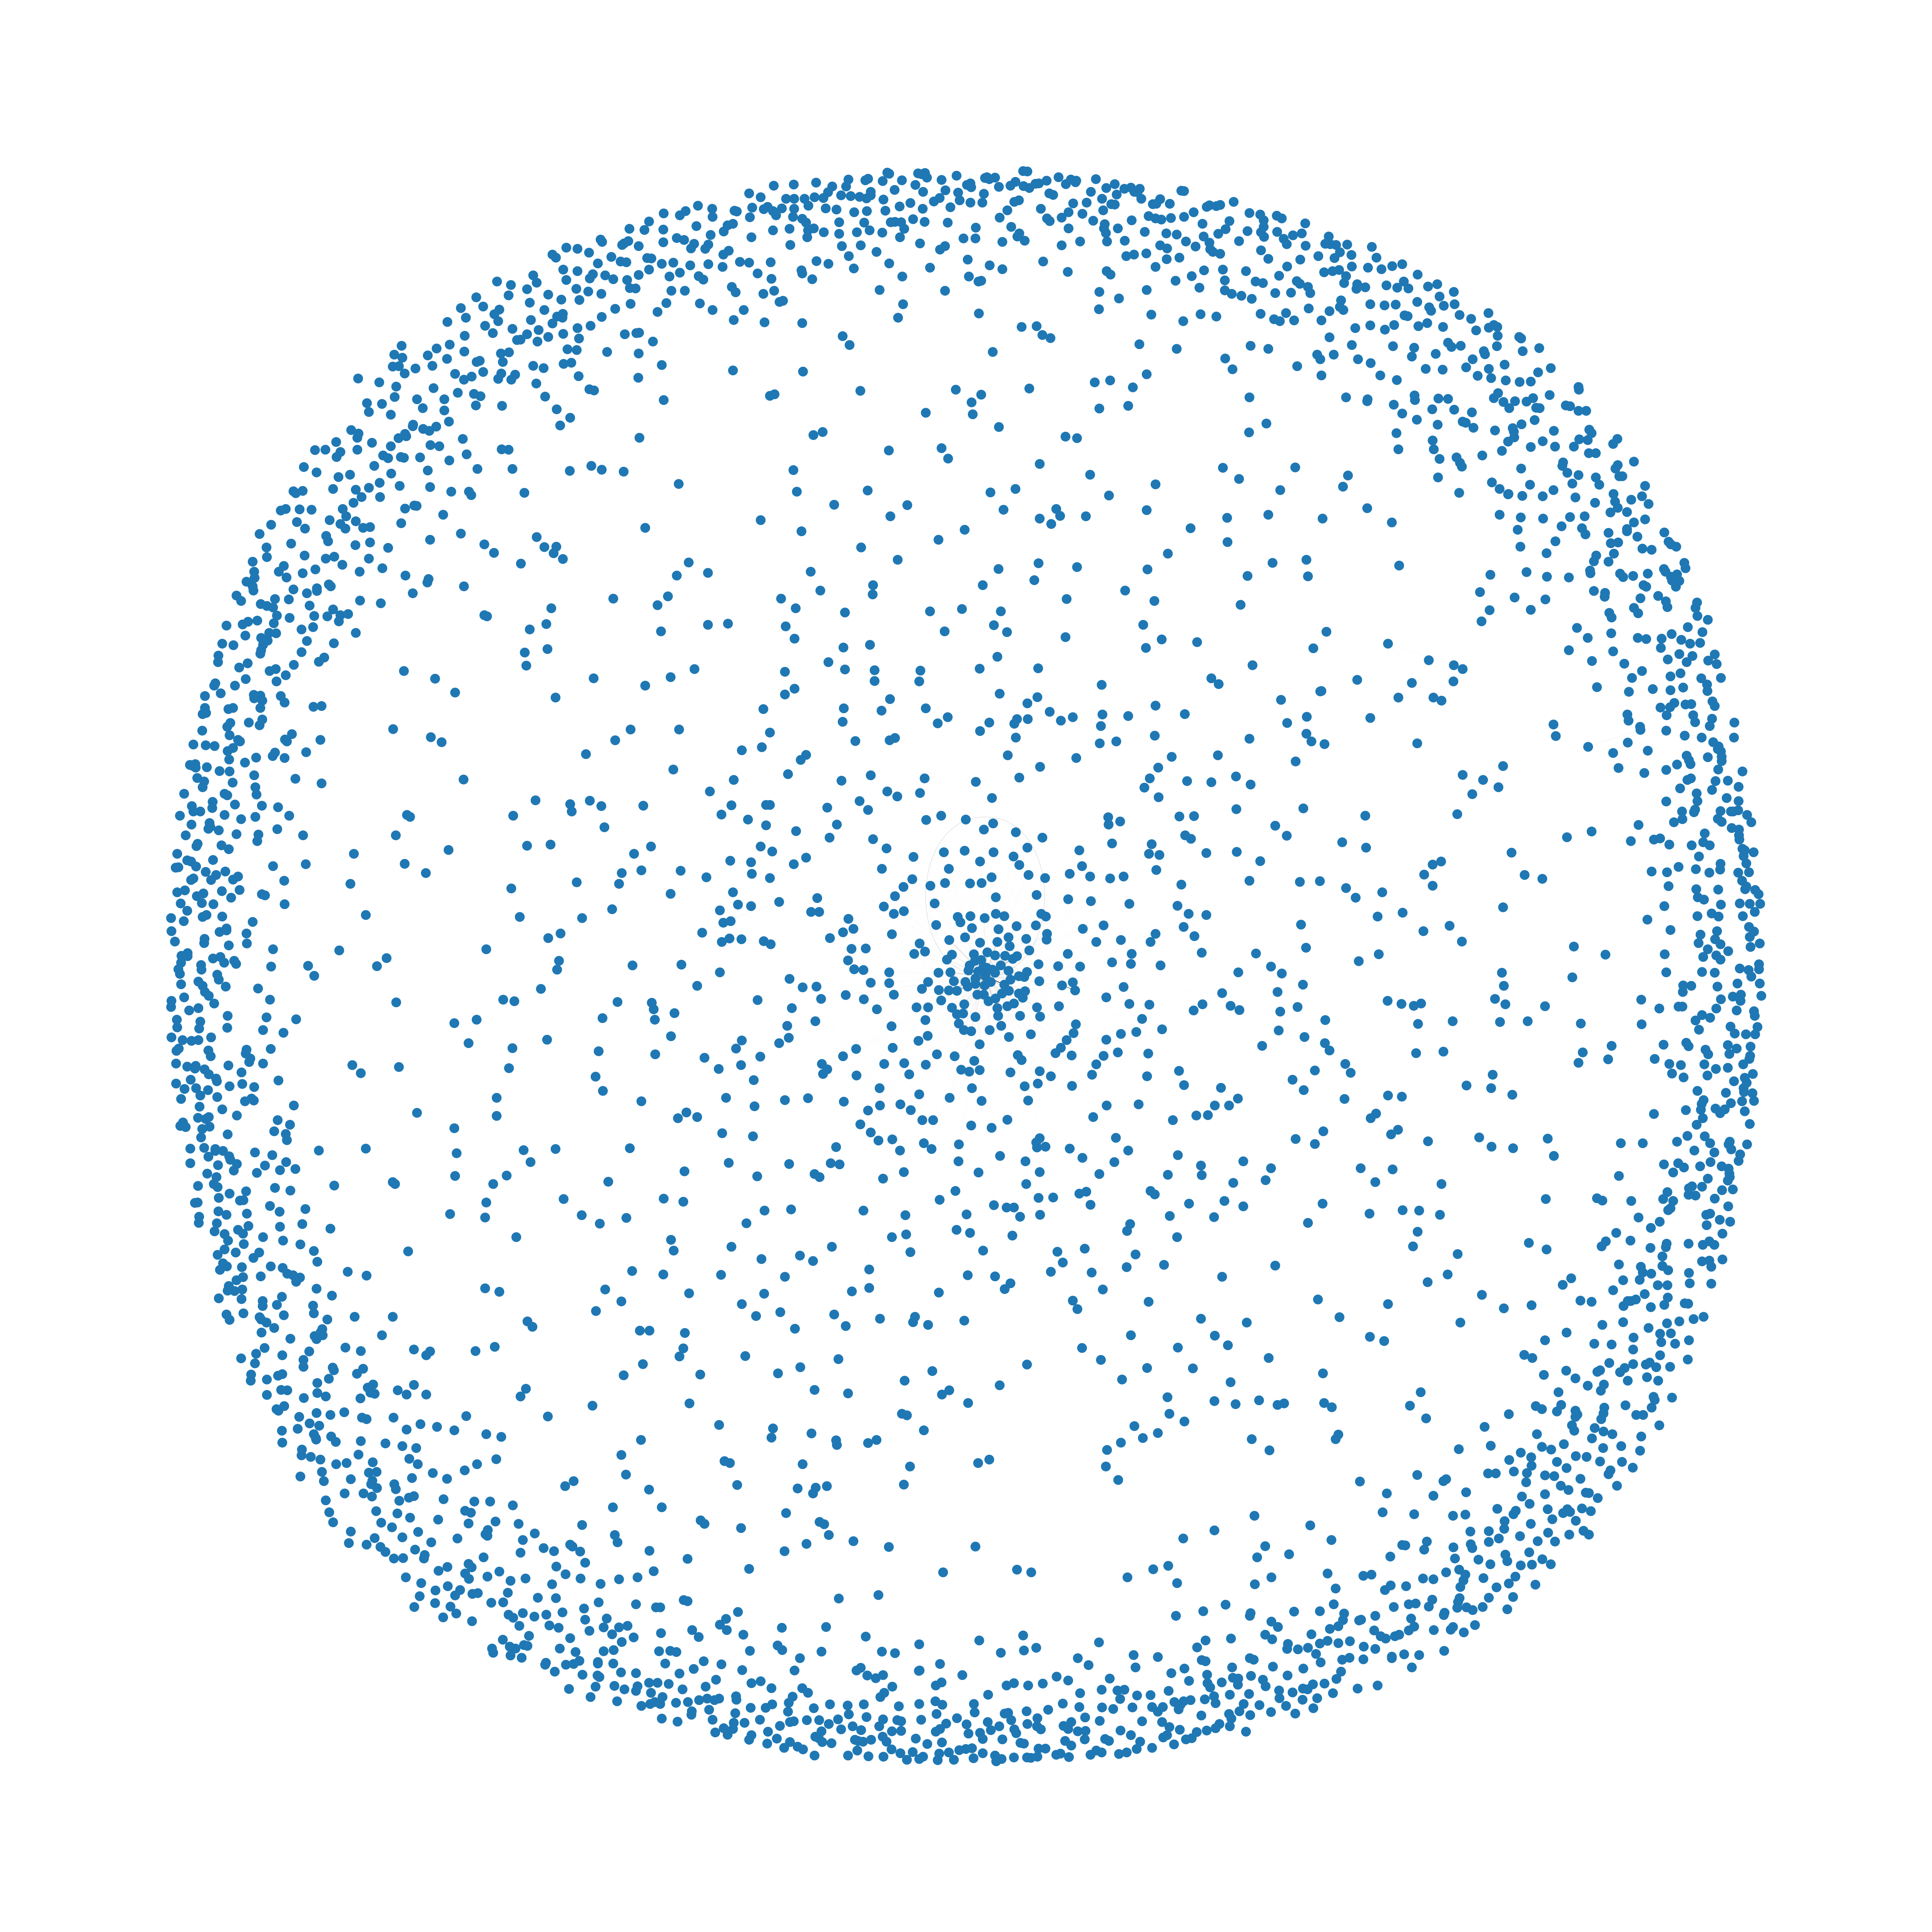

In [27]:
draw_graph(G_week_6)

In [29]:
#save graph to file
nx.write_gexf(G_week_1, "graphs/week_1.gexf")
nx.write_gexf(G_week_2, "graphs/week_2.gexf")
nx.write_gexf(G_week_3, "graphs/week_3.gexf")
nx.write_gexf(G_week_4, "graphs/week_4.gexf")
nx.write_gexf(G_week_5, "graphs/week_5.gexf")
nx.write_gexf(G_week_6, "graphs/week_6.gexf")